### Sentiment Analysis using Naive Bayes Classifier

In [1]:
import pandas as pd
import numpy as np
import re
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv("train.csv")

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df.drop(['keyword','location'],axis=1,inplace=True)
train_df.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
print(train_df.shape)
print("")
print(train_df.info())

(7613, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7613 non-null   int64 
 1   text    7613 non-null   object
 2   target  7613 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 178.6+ KB
None


In [6]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

#### Preprocessing

In [7]:
#convert the text column to lower case
train_df['text']=train_df['text'].apply(lambda x:x.lower())

In [8]:
#substituting the special characters with space
train_df['text']=train_df['text'].apply(lambda x:re.sub(r'[^a-zA-Z0-9]'," ",x))
train_df['text'][0]                                       

'our deeds are the reason of this  earthquake may allah forgive us all'

In [9]:
#tokenise the text column
train_df['words']=train_df['text'].apply(lambda x:word_tokenize(x))
train_df['words'][0]

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'all']

In [10]:
#removing stop words
stop_words=stopwords.words('english')

train_df['words']=train_df['words'].apply(lambda x:[word for word in x if word not in stop_words])
train_df['words'][0]

['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us']

In [11]:
#Stemming
from nltk.stem import PorterStemmer
porter_stemmer=PorterStemmer()
train_df['Porter_Stemming']=train_df['words'].apply(lambda x:[porter_stemmer.stem(word) for word in x])

In [12]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

train_df['lemma']=train_df['words'].apply(lambda x:[lemmatizer.lemmatize(word) for word in x])
train_df['lemma'][0]           

['deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'u']

In [13]:
train_df['cleaned_text']=train_df['lemma'].apply(lambda x:" ".join(map(str,x)))
train_df.head()

,id,text,target,words,Porter_Stemming,lemma,cleaned_text
0,1,our deeds are the reason of this earthquake m...,1,"[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,4,forest fire near la ronge sask canada,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,all residents asked to shelter in place are ...,1,"[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of...",resident asked shelter place notified officer ...
3,6,13 000 people receive wildfires evacuation or...,1,"[13, 000, people, receive, wildfires, evacuati...","[13, 000, peopl, receiv, wildfir, evacu, order...","[13, 000, people, receive, wildfire, evacuatio...",13 000 people receive wildfire evacuation orde...
4,7,just got sent this photo from ruby alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...


In [14]:
train_df_cleaned=train_df.drop(['words','Porter_Stemming','lemma'],axis=1)
train_df_cleaned.head(2)

,id,text,target,cleaned_text
0,1,our deeds are the reason of this earthquake m...,1,deed reason earthquake may allah forgive u
1,4,forest fire near la ronge sask canada,1,forest fire near la ronge sask canada


In [15]:
train_df_cleaned.shape

(7613, 4)

In [16]:
positive = train_df[train_df['target'] == 1]
positive_list = positive['words'].tolist()

# Storing negative data seperately

negative = train_df[train_df['target'] == 0]
negative_list = negative['words'].tolist()

In [17]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

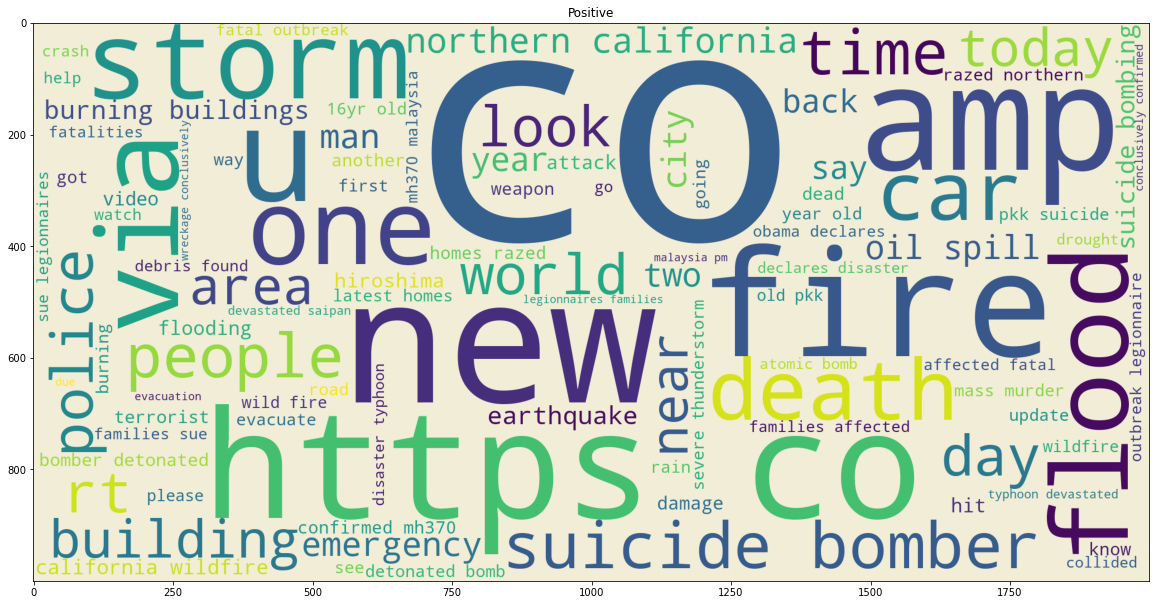

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

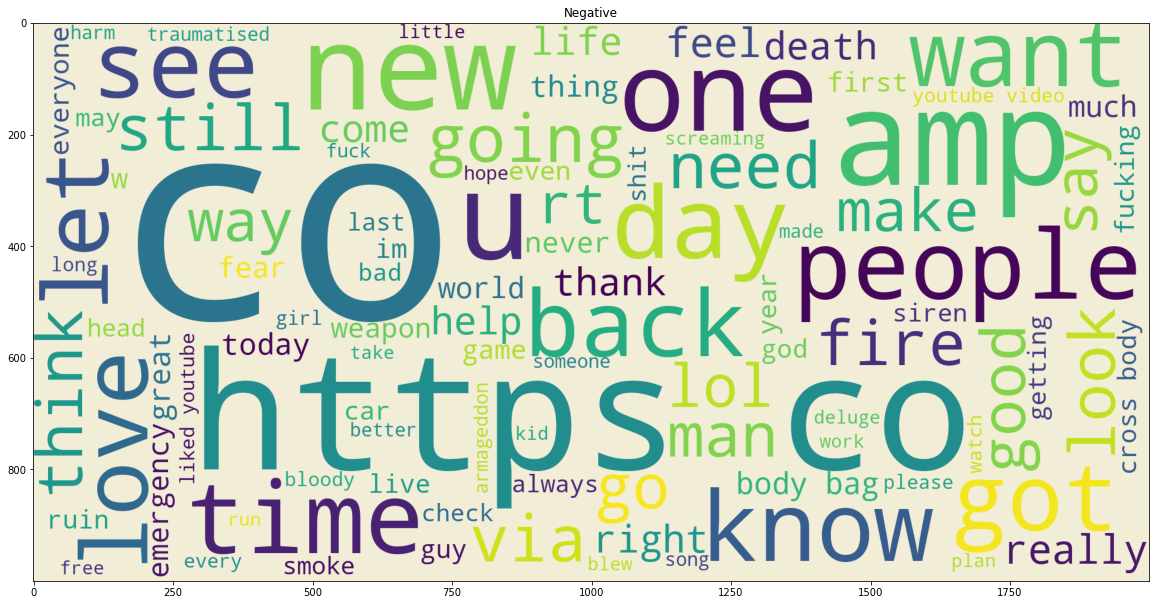

In [19]:
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Negative")
plt.show()

### splitting the data into train and test

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train_df_cleaned ['cleaned_text'],train_df_cleaned['target'],test_size=0.25, random_state=30)

In [21]:
print(X_train.shape)
print(X_test.shape)

(5709,)
(1904,)


### Count Vectorization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#cleaned_text_cv=cv.fit_transform(train_df['cleaned_text'])

In [23]:
cv_x_train=cv.fit_transform(X_train)
cv_x_test=cv.transform(X_test)

In [24]:
cv_x_train.shape

(5709, 16454)

### Model - using count vectorisation

In [25]:
mnb = MultinomialNB()

mnb.fit(cv_x_train,Y_train)
y_test_pred=mnb.predict(cv_x_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
classification_report(Y_test,y_test_pred,output_dict=True)

{'0': {'precision': 0.7573122529644268,
  'recall': 0.8978444236176195,
  'f1-score': 0.8216123499142368,
  'support': 1067},
 '1': {'precision': 0.8294209702660407,
  'recall': 0.6332138590203107,
  'f1-score': 0.7181571815718156,
  'support': 837},
 'accuracy': 0.7815126050420168,
 'macro avg': {'precision': 0.7933666116152338,
  'recall': 0.7655291413189651,
  'f1-score': 0.7698847657430262,
  'support': 1904},
 'weighted avg': {'precision': 0.789011305685777,
  'recall': 0.7815126050420168,
  'f1-score': 0.7761333709737922,
  'support': 1904}}

<AxesSubplot:>

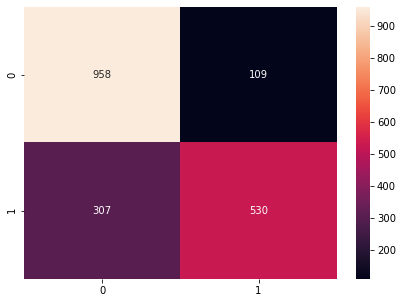

In [36]:
import seaborn as sb
from sklearn import metrics
cm=metrics.confusion_matrix(Y_test, y_test_pred, labels=[0, 1])
plt.figure(figsize = (7,5))
sb.heatmap(cm, annot=True ,fmt='g')

### TF IDF Count Vectorization

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec=TfidfVectorizer(use_idf=True)

In [37]:
tfidf_x_train=tfidf_vec.fit_transform(X_train)
tfidf_x_test=tfidf_vec.transform(X_test)

print(tfidf_x_train.shape)
print(tfidf_x_test.shape)

(5709, 16454)
(1904, 16454)


In [38]:
mnb = MultinomialNB()

mnb.fit(tfidf_x_train,Y_train)
y_test_pred=mnb.predict(tfidf_x_test)

### Model - using tfidf

In [39]:
#using tfidf

mnb.fit(tfidf_x_train,Y_train)
y_test_pred_tf=mnb.predict(tfidf_x_test)

classification_report(Y_test,y_test_pred_tf,output_dict=True)

{'0': {'precision': 0.7573122529644268,
  'recall': 0.8978444236176195,
  'f1-score': 0.8216123499142368,
  'support': 1067},
 '1': {'precision': 0.8294209702660407,
  'recall': 0.6332138590203107,
  'f1-score': 0.7181571815718156,
  'support': 837},
 'accuracy': 0.7815126050420168,
 'macro avg': {'precision': 0.7933666116152338,
  'recall': 0.7655291413189651,
  'f1-score': 0.7698847657430262,
  'support': 1904},
 'weighted avg': {'precision': 0.789011305685777,
  'recall': 0.7815126050420168,
  'f1-score': 0.7761333709737922,
  'support': 1904}}

<AxesSubplot:>

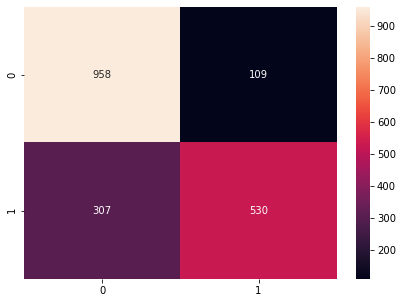

In [40]:
cm1=metrics.confusion_matrix(Y_test, y_test_pred_tf, labels=[0, 1])
plt.figure(figsize = (7,5))
sb.heatmap(cm1, annot=True ,fmt='g')

### Both models give almost same accuracy

### Prediction

In [41]:
test_df=pd.read_csv("test.csv")
test_df.drop(['keyword','location'],axis=1,inplace=True)
test_df.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [42]:
#Preprocessing

test_df['text']=test_df['text'].apply(lambda x:x.lower())
test_df['text']=test_df['text'].apply(lambda x:re.sub(r'[^a-zA-Z0-9]'," ",x))
test_df['words']=test_df['text'].apply(lambda x:word_tokenize(x))

test_df['words']=test_df['words'].apply(lambda x:[word for word in x if word not in stop_words])
test_df['Porter_Stemming']=test_df['words'].apply(lambda x:[porter_stemmer.stem(word) for word in x])
test_df['lemma']=test_df['words'].apply(lambda x:[lemmatizer.lemmatize(word) for word in x])
test_df['cleaned_text']=test_df['lemma'].apply(lambda x:" ".join(map(str,x)))
test_df_cleaned=test_df.drop(['words','Porter_Stemming','lemma'],axis=1)
test_df_cleaned.head(2)

,id,text,cleaned_text
0,0,just happened a terrible car crash,happened terrible car crash
1,2,heard about earthquake is different cities s...,heard earthquake different city stay safe ever...


In [43]:
cv_test=cv.transform(test_df_cleaned['cleaned_text'])
cv_test.shape

(3263, 16454)

In [44]:
pred=mnb.predict(cv_test)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
pred[1004]

0

In [46]:
test_df_cleaned['target']=mnb.predict(cv_test)
test_df_cleaned.head(2)

,id,text,cleaned_text,target
0,0,just happened a terrible car crash,happened terrible car crash,1
1,2,heard about earthquake is different cities s...,heard earthquake different city stay safe ever...,1


In [47]:
positive=test_df_cleaned[(test_df_cleaned['target']==1)]
positive

,id,text,cleaned_text,target
0,0,just happened a terrible car crash,happened terrible car crash,1
1,2,heard about earthquake is different cities s...,heard earthquake different city stay safe ever...,1
2,3,there is a forest fire at spot pond geese are...,forest fire spot pond goose fleeing across str...,1
3,9,apocalypse lighting spokane wildfires,apocalypse lighting spokane wildfire,1
4,11,typhoon soudelor kills 28 in china and taiwan,typhoon soudelor kill 28 china taiwan,1
...,...,...,...,...
3258,10861,earthquake safety los angeles safety faste...,earthquake safety los angeles safety fastener ...,1
3259,10865,storm in ri worse than last hurricane my city...,storm ri worse last hurricane city amp 3others...,1
3260,10868,green line derailment in chicago http t co u...,green line derailment chicago http co utbxlcbiuy,1
3261,10874,meg issues hazardous weather outlook hwo htt...,meg issue hazardous weather outlook hwo http c...,1


In [48]:
negative=test_df_cleaned[(test_df_cleaned['target']==0)]
negative

,id,text,cleaned_text,target
6,21,they d probably still show more life than arse...,probably still show life arsenal yesterday eh eh,0
7,22,hey how are you,hey,0
8,27,what a nice hat,nice hat,0
9,29,fuck off,fuck,0
10,30,no i don t like cold,like cold,0
...,...,...,...,...
3248,10807,smackdown tyme this should put me in a good mo...,smackdown tyme put good mood since got wrecked...,0
3249,10816,thrillhho jsyk i haven t stopped thinking abt...,thrillhho jsyk stopped thinking abt remus slum...,0
3250,10820,stighefootball begovic has been garbage he g...,stighefootball begovic garbage got wrecked red...,0
3251,10828,wrecked today got my hattrick,wrecked today got hattrick,0
